# Titanic Dataset Feature Engineering Analysis

This notebook explores feature engineering techniques on the Titanic dataset to improve survival prediction. We'll focus on creating new meaningful features from existing data and analyzing their impact.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Setup and Data Loading

First, let's import the necessary libraries and load our dataset.

In [1]:
import seaborn as sns


# Load titanic dataset
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use just one style from the available list
plt.style.use('seaborn-v0_8-whitegrid')  # This looks like a good choice for data visualization
# or another option could be:
# plt.style.use('seaborn-v0_8-darkgrid')

# Set your color palette
sns.set_palette("husl")

# Display all columns
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Display first few rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Exploration

In [6]:
# Create a dictionary with explanations for each column
column_explanations = {
    'PassengerId': 'Unique identifier for each passenger',
    'Survived': 'Survival status (1 = Survived, 0 = Did not survive)',
    'Pclass': 'Passenger class/ticket class (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)',
    'Name': 'Full name of passenger',
    'Sex': 'Gender of passenger (male/female)',
    'Age': 'Age of passenger in years',
    'SibSp': 'Number of siblings/spouses aboard',
    'Parch': 'Number of parents/children aboard',
    'Ticket': 'Ticket number',
    'Fare': 'Passenger fare in pounds',
    'Cabin': 'Cabin number',
    'Embarked': 'Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)',
    'Title': 'Title extracted from name (Mr, Mrs, Miss, Master, Rare)',
    'FamilySize': 'Total number of family members aboard including the passenger',
    'IsAlone': 'Whether the passenger was traveling alone (0 = No, 1 = Yes)',
    'AgeBand': 'Age grouped into bands/categories',
    'FareBand': 'Fare grouped into bands/categories'
}

# Print column explanations
print("TITANIC DATASET COLUMN DESCRIPTIONS")
print("===================================")
for column in df.columns:
    if column in column_explanations:
        print(f"{column}: {column_explanations[column]}")
    else:
        print(f"{column}: No description available")

TITANIC DATASET COLUMN DESCRIPTIONS
PassengerId: Unique identifier for each passenger
Survived: Survival status (1 = Survived, 0 = Did not survive)
Pclass: Passenger class/ticket class (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)
Name: Full name of passenger
Sex: Gender of passenger (male/female)
Age: Age of passenger in years
SibSp: Number of siblings/spouses aboard
Parch: Number of parents/children aboard
Ticket: Ticket number
Fare: Passenger fare in pounds
Cabin: Cabin number
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Feature Engineering

Let's create new features that might help in predicting survival.

### 3.1 Title Extraction

Extract titles (Mr., Mrs., Miss, etc.) from the 'Name' field.

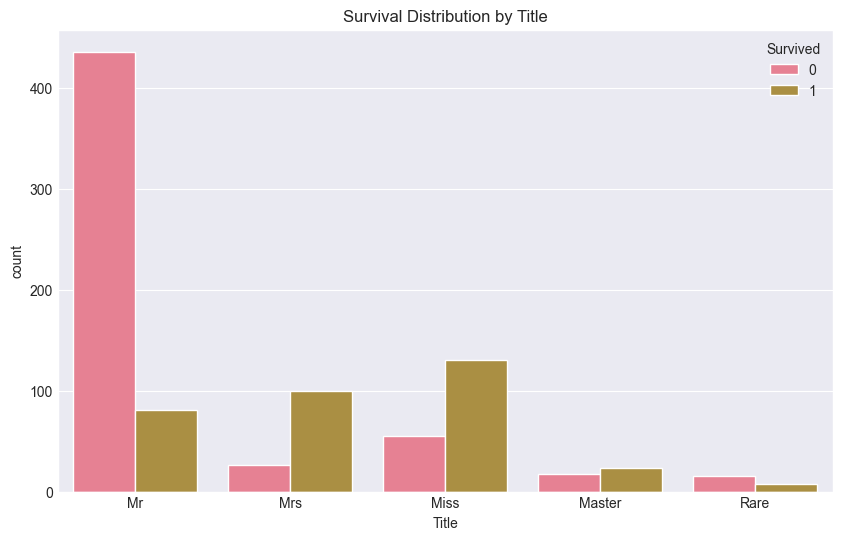

Survival Rate by Title:
Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64


In [9]:
# Extract titles from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)

# Display original title counts before mapping
# print("Original Title Counts:")
# original_title_counts = df['Title'].value_counts()
# print(original_title_counts)
# print("\n")

# # Create a bar chart of original title counts
# plt.figure(figsize=(12, 6))
# sns.barplot(x=original_title_counts.index, y=original_title_counts.values)
# plt.title('Count of Passengers by Original Title')
# plt.ylabel('Count')
# plt.xlabel('Title')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Group rare titles
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Countess': 'Rare',
    'Ms': 'Miss',
    'Lady': 'Rare',
    'Jonkheer': 'Rare',
    'Don': 'Rare',
    'Dona': 'Rare',
    'Mme': 'Mrs',
    'Capt': 'Rare',
    'Sir': 'Rare'
}

df['Title'] = df['Title'].map(title_mapping)

# Display title counts after mapping
# print("Title Counts After Grouping:")
# title_counts = df['Title'].value_counts()
# print(title_counts)
# print("\n")

# Create a bar chart of grouped title counts
# plt.figure(figsize=(10, 6))
# sns.barplot(x=title_counts.index, y=title_counts.values)
# plt.title('Count of Passengers by Grouped Title')
# plt.ylabel('Count')
# plt.xlabel('Title')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Visualize title distribution by survival
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Title', hue='Survived')
plt.title('Survival Distribution by Title')
plt.show()

# Calculate survival rate by title
title_survival = df.groupby('Title')['Survived'].mean().sort_values(ascending=False)
print("Survival Rate by Title:")
print(title_survival)

### 3.2 Family Size and Is Alone Features

Calculate family size and determine if passenger was traveling alone.

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,Mr


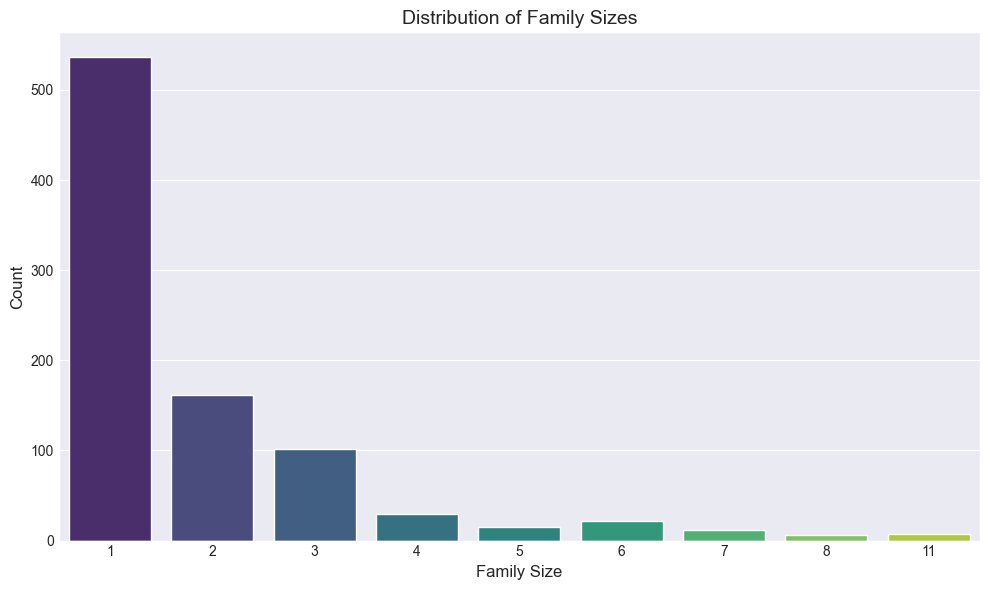

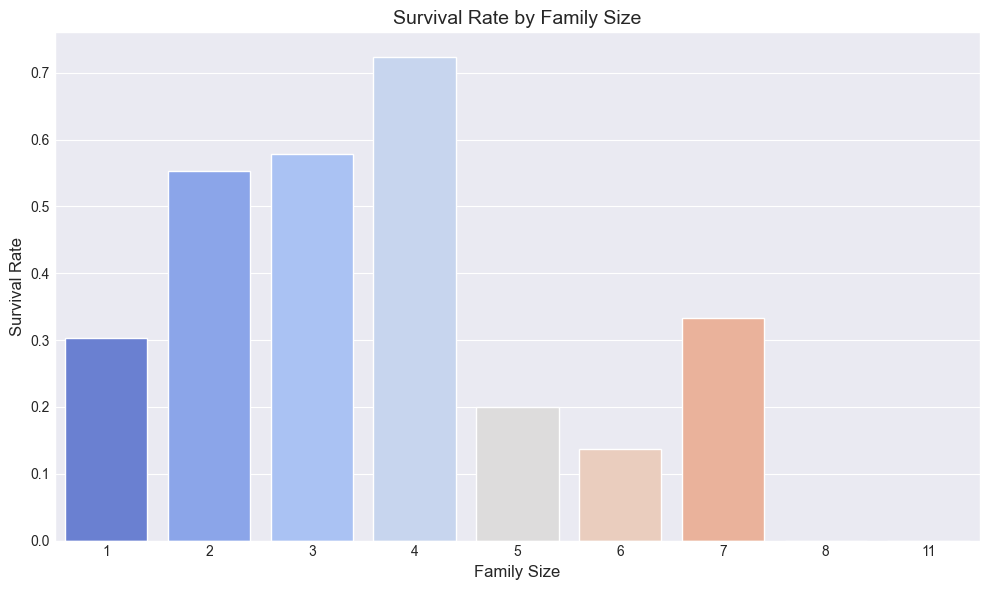

Survival Rate by Family Size with counts:
   FamilySize  Survived  Count
0           1  0.303538    537
1           2  0.552795    161
2           3  0.578431    102
3           4  0.724138     29
4           5  0.200000     22
5           6  0.136364     15
6           7  0.333333     12
7           8  0.000000      7
8          11  0.000000      6


In [11]:
# Calculate family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 1. Family Size Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FamilySize', palette='viridis')
plt.title('Distribution of Family Sizes', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Family Size vs Survival Rate
plt.figure(figsize=(10, 6))
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()
sns.barplot(data=family_survival, x='FamilySize', y='Survived', palette='coolwarm')
plt.title('Survival Rate by Family Size', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.tight_layout()
plt.show()

## Survival Rate by Family Size
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()
print("Survival Rate by Family Size with counts:")
family_survival['Count'] = df['FamilySize'].value_counts().values
print(family_survival)

### 3.3 Cabin Deck Feature

Extract the deck letter from the 'Cabin' field.

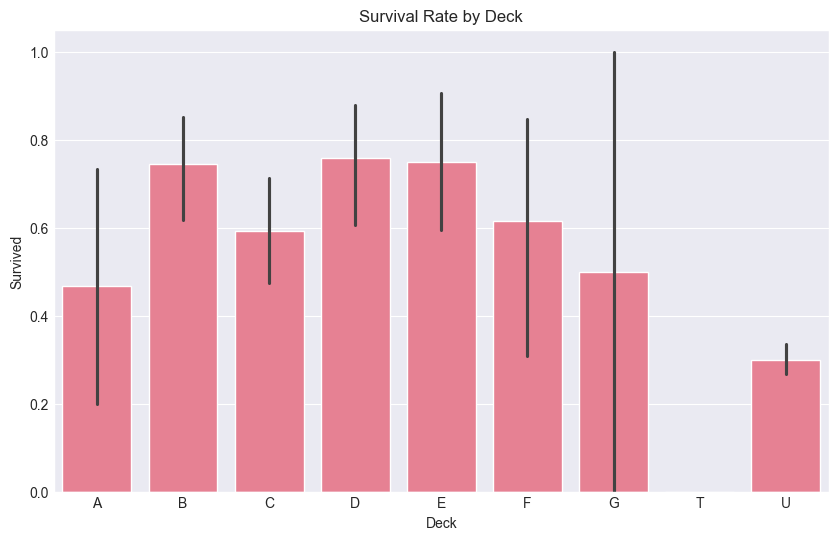

Survival Rate by Deck:
Deck
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
U    0.299854
T    0.000000
Name: Survived, dtype: float64


In [13]:
# Extract deck from cabin
df['Deck'] = df['Cabin'].str.extract('([A-Z])', expand=False)

# Fill missing values with 'U' for Unknown
df['Deck'] = df['Deck'].fillna('U')

# Visualize survival rate by deck
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Deck', y='Survived', order=sorted(df['Deck'].unique()))
plt.title('Survival Rate by Deck')
plt.show()

# Print survival statistics by deck
print("Survival Rate by Deck:")
print(df.groupby('Deck')['Survived'].mean().sort_values(ascending=False))

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,Rare,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,Miss,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,0,Miss,U
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,Mr,C


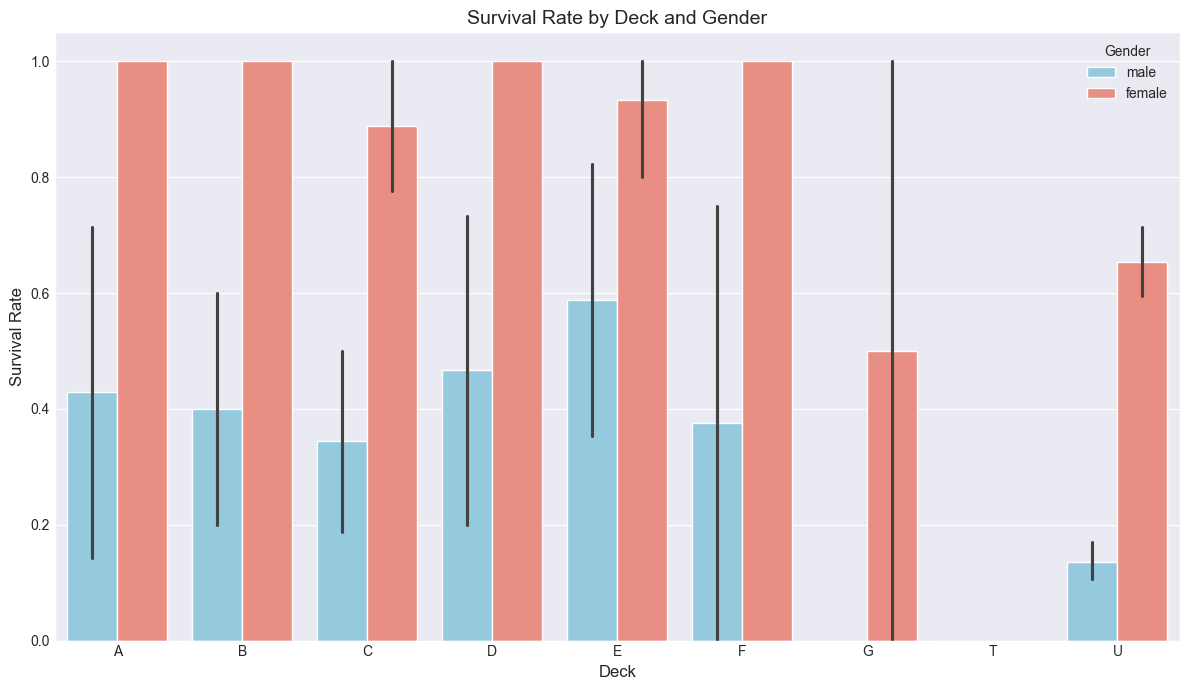

Survival Rate by Deck and Gender:
             Survived      
                 mean count
Deck Sex                   
A    female  1.000000     1
B    female  1.000000    27
D    female  1.000000    18
F    female  1.000000     5
E    female  0.933333    15
C    female  0.888889    27
U    female  0.654378   217
E    male    0.588235    17
G    female  0.500000     4
D    male    0.466667    15
A    male    0.428571    14
B    male    0.400000    20
F    male    0.375000     8
C    male    0.343750    32
U    male    0.136170   470
T    male    0.000000     1


In [15]:
# Extract deck from cabin
df['Deck'] = df['Cabin'].str.extract('([A-Z])', expand=False)

# Fill missing values with 'U' for Unknown
df['Deck'] = df['Deck'].fillna('U')

# 1. Survival rate by deck with gender hue
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Deck', y='Survived', hue='Sex', order=sorted(df['Deck'].unique()), palette=['skyblue', 'salmon'])
plt.title('Survival Rate by Deck and Gender', fontsize=14)
plt.xlabel('Deck', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()



# Print detailed statistics by deck and gender
print("Survival Rate by Deck and Gender:")
deck_gender_stats = df.groupby(['Deck', 'Sex']).agg({
    'Survived': ['mean', 'count']
}).sort_values([('Survived', 'mean')], ascending=False)
print(deck_gender_stats)

## 4. Feature Importance Analysis

Let's analyze which of our engineered features are most important for survival prediction.

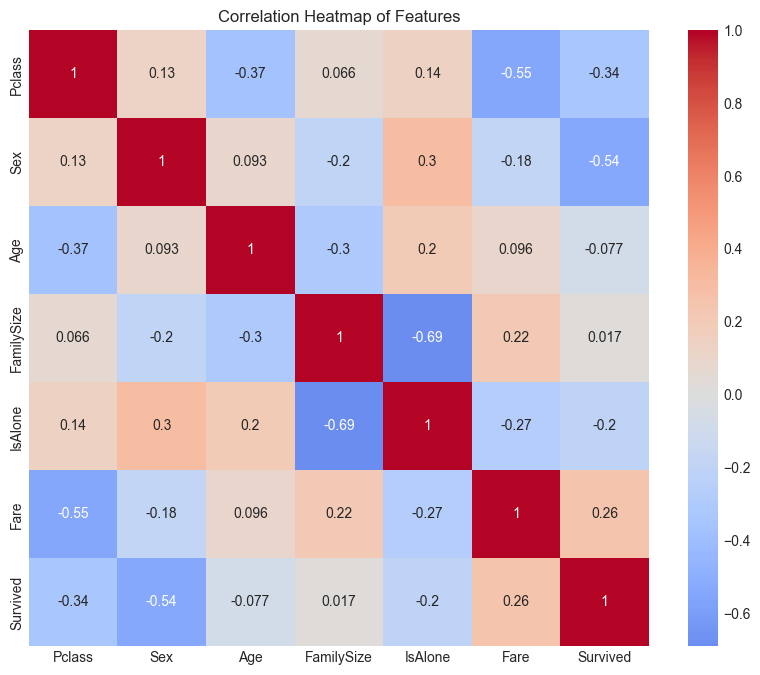

Feature Correlations with Survival:
Survived      1.000000
Fare          0.257307
FamilySize    0.016639
Age          -0.077221
IsAlone      -0.203367
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64


In [16]:
from sklearn.preprocessing import LabelEncoder

# Prepare features for correlation analysis
features_for_correlation = ['Pclass', 'Sex', 'Age', 'FamilySize', 'IsAlone', 'Fare']

# Create correlation df
correlation_df = df[features_for_correlation].copy()
correlation_df['Sex'] = LabelEncoder().fit_transform(correlation_df['Sex'])
correlation_df['Survived'] = df['Survived']

# Calculate correlations
correlations = correlation_df.corr()['Survived'].sort_values(ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

print("Feature Correlations with Survival:")
print(correlations)

## 5. Conclusions

From our feature engineering analysis, we can conclude:

1. **Title Analysis**: Titles provide significant insight into survival rates, with some titles (like 'Mrs' and 'Miss') having higher survival rates.

2. **Family Size**: Medium-sized families (2-4 members) had better survival rates than both single travelers and very large families.

3. **Deck Location**: Cabin deck showed clear correlation with survival, with upper decks generally having higher survival rates.


These engineered features could be valuable inputs for understanding survival on the Titanic.